# TASK 2-Prediction Using Unsupervised Machine Learning

## Author-Tanishk Singh
THE SPARKS FOUNDATION (GRIP): DATA SCIENCE AND BUSINESS ANALYTICS
THE AIM OF THE PROJECT IS TO PREDICT THE OPTIMUM NUMBER OF CLUSTERS FROM THE IRIS DATASET AND VISUALIZE IT.

In [108]:
# import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [109]:
# Load the iris dataset
df=pd.read_csv("Iris1.csv")


In [110]:
iris_df.head() 
# See the first 5 rows

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Exploratory Data Analysis

In [111]:
#Shape of dataset given
df.shape

(150, 6)

In [112]:
#columns in a dataset given
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [114]:
#statistical analysis of dataframe given
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [115]:
df = df.drop(['Id'], axis = 1)
#dropping the id column since its unique and hence no aggregation can be made on it
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Determining the correlation between variables and plotting them using heatmap

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

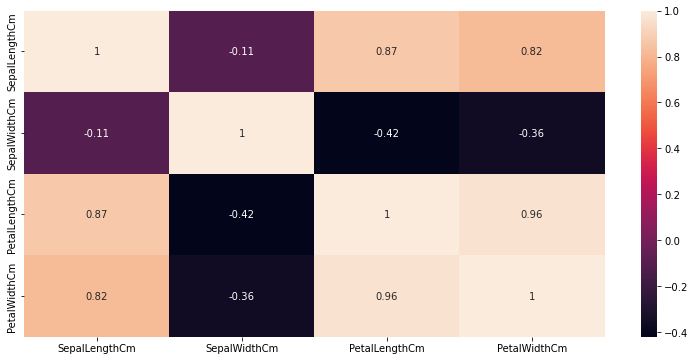

In [116]:
corr_data=df.corr()
display(corr_data)
plt.subplots(figsize=(13,6))
sns.heatmap(corr_data,annot=True)

#### petal length ,petal width,sepal length,species is highly positively correlated whereas sepal width is negatively correlated to all

C:\Users\asus\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


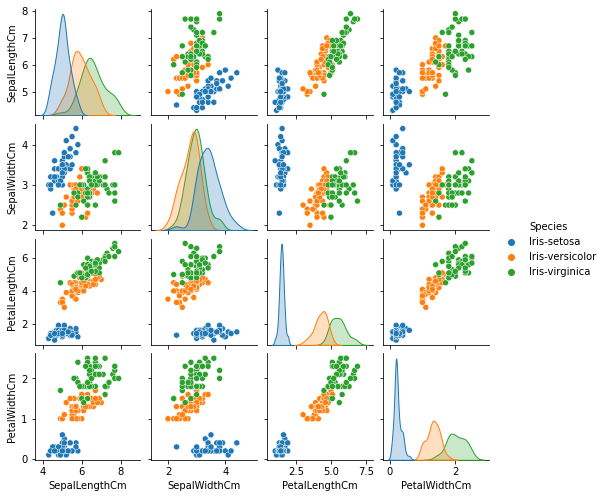

In [117]:
#Plotting Pairplot

sns.pairplot(df,hue="Species",size=1.75);
plt.show()

THE PETAL LENGTH AND THE PETAL WIDTH SEEM TO BE POSITIVELY CORRELATED AND HAVE A LINEAR RELATIONSHIP.

IRIS SETOSA SEEMS TO HAVE A SMALLER PETAL LENGTH AND PETAL WIDTH AS COMPARED TO OTHERS AND IT SEEMS THAT IRIS SETOSE HAS SMALLER DIMENSIONS THAN OTHER FLOWERS.

In [118]:
# Converting Categorical Features into Numeric
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
label.fit(df['Species'])
df['Species']=label.transform(df['Species'])

# DETERMINING THE OPTIMUM NUMBER OF CLUSTERS USING THE ELBOW METHOD

C:\Users\asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


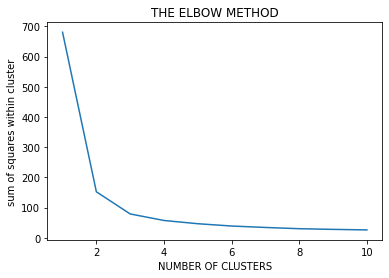

In [119]:
# Finding the optimum number of clusters for k-means classification

x = df.iloc[:, [0, 1, 2, 3]].values


from sklearn.cluster import KMeans
array = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    array.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), array)
plt.title('THE ELBOW METHOD')
plt.xlabel('NUMBER OF CLUSTERS')
plt.ylabel('sum of squares within cluster') #Within cluster sum of squares
plt.show()

# K MEANS CLUSTERING

In [120]:
kmeans = KMeans(n_clusters = 3, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

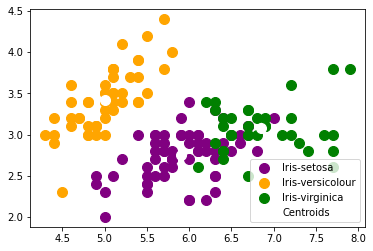

In [121]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'white', label = 'Centroids')

plt.legend()

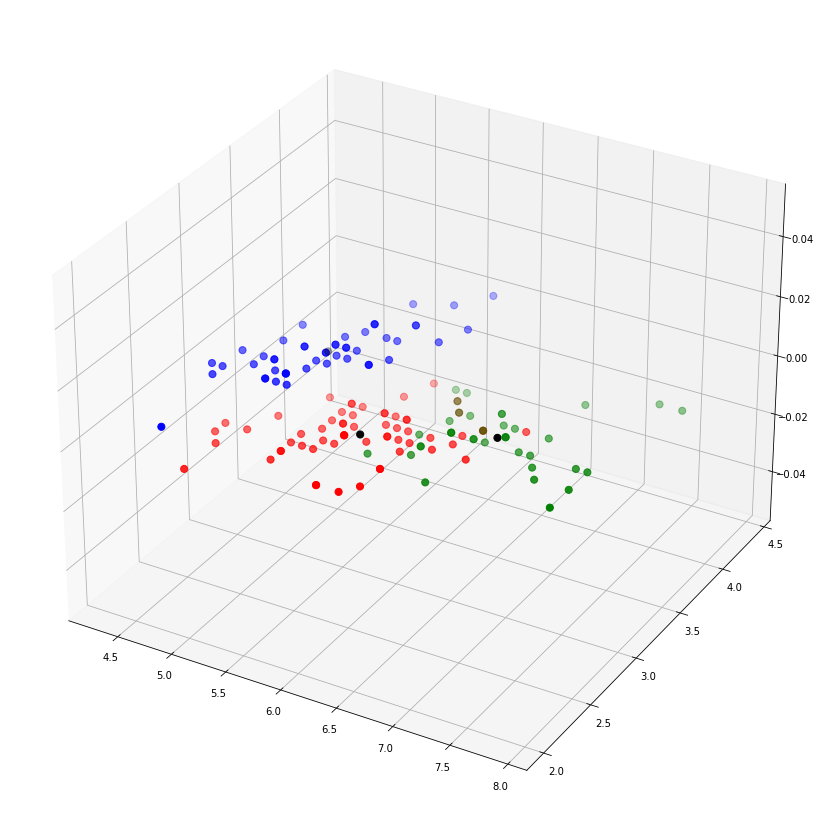

In [122]:
#Visualising the clusters in 3d
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Iris_setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Iris_versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Iris_virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'black', label = 'Centroids')

# Thankyou